In [1]:
%pip install nbformat>=4.2.0
import argparse
import math
import numpy as np
import gudhi as gd
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
#%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [2]:
# plt.close('all')  # Close any existing plots to avoid conflicts
sys.argv = [
    'notebook1',  # script name (dummy)
    '-f', '/home/unipi/i.inuso/Develop/unipi-lab-comp-project/tore3D_1307.off',  # file path - adjust as needed
    '-t', '0.15',  # threshold
    '-d', '3'    # max_dimension
]

parser = argparse.ArgumentParser(
    description="AlphaComplex and RipsComplex "
    "persistence creation from points read in "
    "a OFF file. Bottleneck distance computation"
    " on each dimension",
    epilog="Example: "
    "example/alpha_rips_persistence_bottleneck_distance.py "
    "-f ../data/points/tore3D_1307.off -t 0.15 -d 3",
)
parser.add_argument("-f", "--file", type=str, required=True)
parser.add_argument("-t", "--threshold", type=float, default=0.5)
parser.add_argument("-d", "--max_dimension", type=int, default=1)

args = parser.parse_args()
point_cloud = gd.read_points_from_off_file(off_file=args.file)
print("##############################################################")
print("RipsComplex creation from points read in a OFF file")

min_coords = np.min(point_cloud, axis=0)
max_coords = np.max(point_cloud, axis=0)
data_range = np.linalg.norm(max_coords - min_coords) # Diagonal length of bounding box

max_edge_length = data_range * 0.05

# Fallback for very small or zero range
if max_edge_length < 1e-6:
    max_edge_length = 1.0 
print(f"Max edge length: {max_edge_length}")

print(f"RipsComplex with max_edge_length={max_edge_length}")

rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)

rips_stree = rips_complex.create_simplex_tree(max_dimension=args.max_dimension)

message = "Number of simplices=" + repr(rips_stree.num_simplices())
print(message)

rips_stree.compute_persistence()

print("##############################################################")
print("AlphaComplex creation from points read in a OFF file")

print(f"AlphaComplex with max_edge_length={max_edge_length}")

alpha_complex = gd.AlphaComplex(points=point_cloud)
alpha_stree = alpha_complex.create_simplex_tree(
    max_alpha_square=(max_edge_length * max_edge_length)
)

message = "Number of simplices=" + repr(alpha_stree.num_simplices())
print(message)

alpha_stree.compute_persistence()

print("##############################################################")
print("AlphaComplex creation from points read in a OFF file")

print(f"AlphaComplex with max_edge_length={math.inf}")

alpha_inf_complex = gd.AlphaComplex(points=point_cloud)
alpha_inf_stree = alpha_inf_complex.create_simplex_tree()

message = "Number of simplices=" + repr(alpha_inf_stree.num_simplices())
print(message)

alpha_inf_stree.compute_persistence()

print("##############################################################")
max_b_distance_r_a = 0.0
max_b_distance_r_inf = 0.0
max_b_distance_a_inf = 0.0
for dim in range(args.max_dimension):
    # Alpha persistence values needs to be transform because filtration
    # values are alpha square values
    alpha_intervals = np.sqrt(alpha_stree.persistence_intervals_in_dimension(dim))
    alpha_inf_intervals = np.sqrt(alpha_inf_stree.persistence_intervals_in_dimension(dim))
    rips_intervals = rips_stree.persistence_intervals_in_dimension(dim)
    bottleneck_distance_r_a = gd.bottleneck_distance(rips_intervals, alpha_intervals)
    message = (
        "In dimension " + repr(dim) + ", bottleneck distance rips-alpha = " + repr(bottleneck_distance_r_a)
    )
    print(message)
    max_b_distance_r_a = max(bottleneck_distance_r_a, max_b_distance_r_a)
    
    bottleneck_distance_r_inf = gd.bottleneck_distance(rips_intervals, alpha_inf_intervals)
    message = (
        "In dimension " + repr(dim) + ", bottleneck distance rips-alpha_inf = " + repr(bottleneck_distance_r_inf)
    )
    print(message)
    max_b_distance_r_inf = max(bottleneck_distance_r_inf, max_b_distance_r_inf)

    bottleneck_distance_a_inf = gd.bottleneck_distance(alpha_intervals, alpha_inf_intervals)
    message = (
        "In dimension " + repr(dim) + ", bottleneck distance alpha-alpha_inf = " + repr(bottleneck_distance_a_inf)
    )
    print(message)
    max_b_distance_a_inf = max(bottleneck_distance_a_inf, max_b_distance_a_inf)

print("==============================================================")
message = "Bottleneck distance between Rips and Alpha is " + repr(max_b_distance_r_a)
print(message)
message = "Bottleneck distance between Rips and Alpha_inf is " + repr(max_b_distance_r_inf)
print(message)
message = "Bottleneck distance between Alpha and Alpha_inf is " + repr(max_b_distance_a_inf)
print(message)

##############################################################
RipsComplex creation from points read in a OFF file
Max edge length: 0.18603983199241234
RipsComplex with max_edge_length=0.18603983199241234
Number of simplices=33380
##############################################################
AlphaComplex creation from points read in a OFF file
AlphaComplex with max_edge_length=0.18603983199241234
Number of simplices=8422
##############################################################
AlphaComplex creation from points read in a OFF file
AlphaComplex with max_edge_length=inf
Number of simplices=46079
##############################################################
In dimension 0, bottleneck distance rips-alpha = 0.06127273021907867
In dimension 0, bottleneck distance rips-alpha_inf = 0.06127273021907867
In dimension 0, bottleneck distance alpha-alpha_inf = 1.057818055851941e-308
In dimension 1, bottleneck distance rips-alpha = 0.052173512288324994
In dimension 1, bottleneck distance rips-a

SIMPLICIAL COMPLEX COMPARISON
File: /home/unipi/i.inuso/Develop/unipi-lab-comp-project/tore3D_1307.off
Points: 1307
Max edge length: 0.18603983199241234
Max dimension: 3
Creating RipsComplex (max_edge_length=0.18603983199241234)


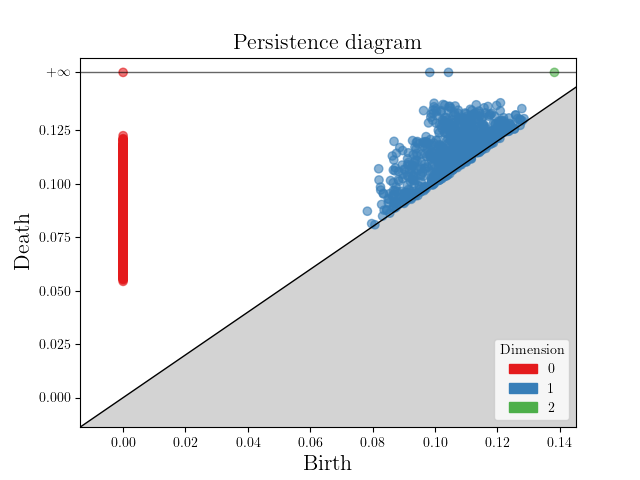

Creating AlphaComplex (max_alpha_square=0.03461081908776501)


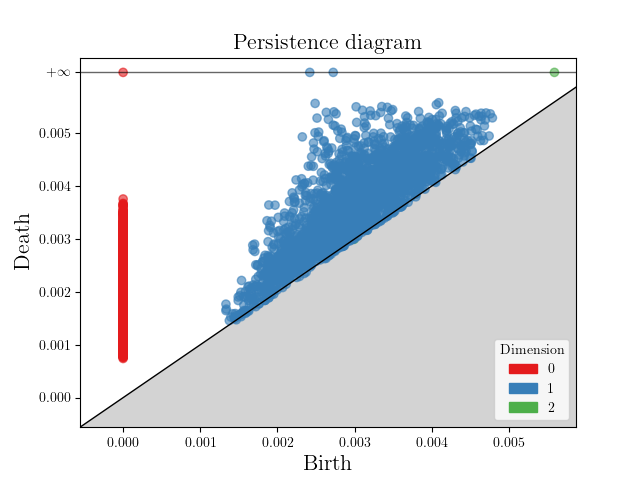

Creating AlphaComplex (unbounded)


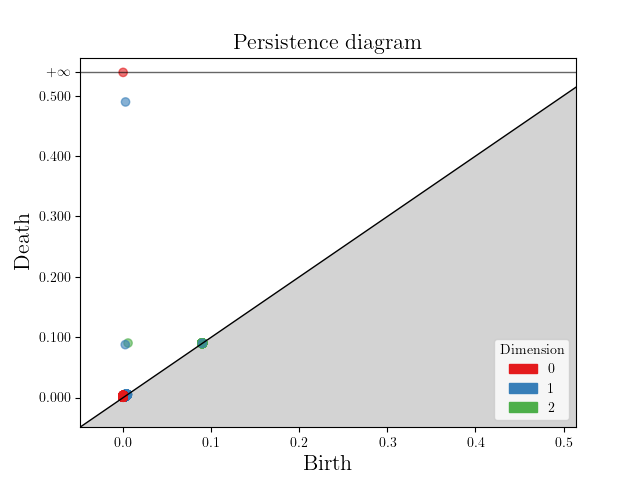

Creating Weak Witness Complex (max_alpha_square=0)
landmarks=[[0.351666, 1.193906, 0.172983], [-0.460774, -1.212046, -0.046903], [1.208277, -0.427621, -0.102134], [-1.239215, 0.383964, -0.040221], [1.03842, 0.573741, -0.235162], [0.48888, -1.017382, 0.270835], [-0.562879, 1.104166, -0.180672], [-1.158436, -0.55982, 0.087646], [0.725727, 0.056212, 0.127028], [-0.57994, 0.472056, 0.162251], [0.084642, -0.82315, -0.243917], [-0.480323, -0.53286, 0.101348], [-0.7848, -0.05132, -0.210683], [0.022346, 0.754006, -0.172106], [0.700611, -0.764893, -0.29792], [0.682704, 0.684132, 0.29812], [-0.230347, 1.037901, 0.293338], [-0.084473, -0.912505, 0.287939], [0.554536, 0.885807, -0.296415], [-0.993747, -0.023773, 0.299917], [0.858941, -0.609519, 0.29499], [-0.770782, -0.787327, -0.282279], [1.266931, 0.099039, 0.129284], [-0.795825, 0.632666, -0.299354], [0.139164, -1.29109, -0.027577], [-0.978607, 0.795203, 0.147752], [-0.075228, 1.249002, -0.16381], [1.01605, 0.073361, -0.299309], [-0.79654, -0.8

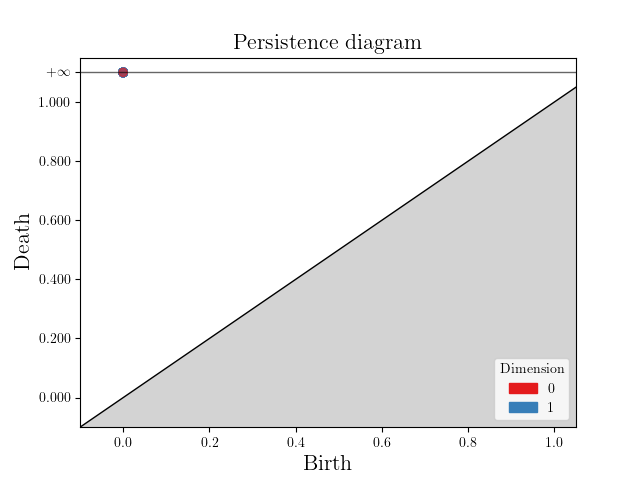

Creating Relaxed Weak Witness Complex (max_alpha_square=0.03461081908776501)


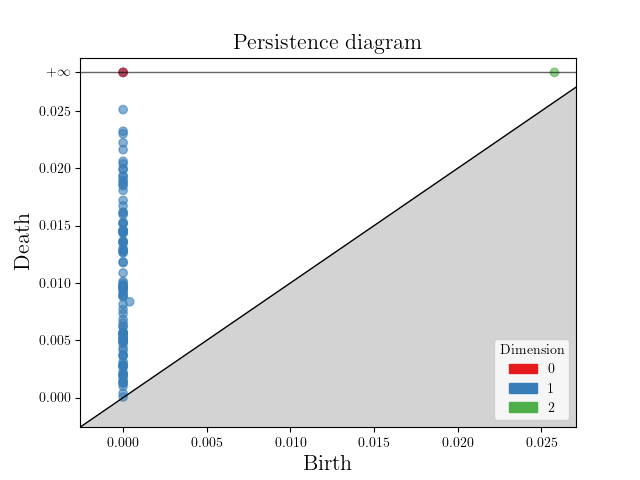

Creating Strong Witness Complex (max_alpha_square=0.03461081908776501)


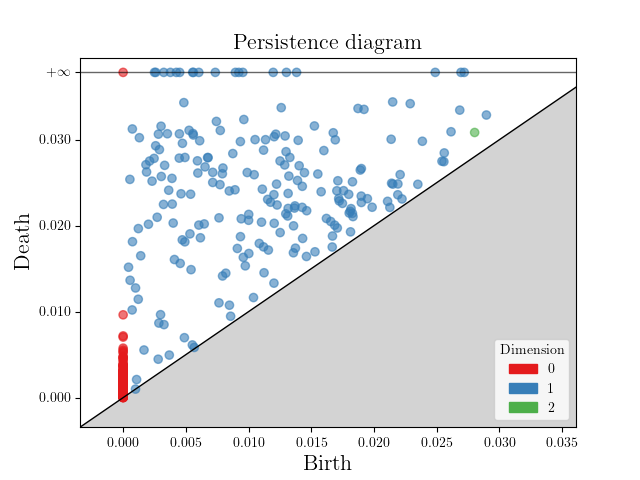

Rips complex: 33380 simplices
Alpha complex: 8422 simplices
Alpha_inf complex: 46079 simplices
Witness complex: 806 simplices
Relaxed_witness complex: 1918 simplices
Strong_witness complex: 1838 simplices

Rips Complex:


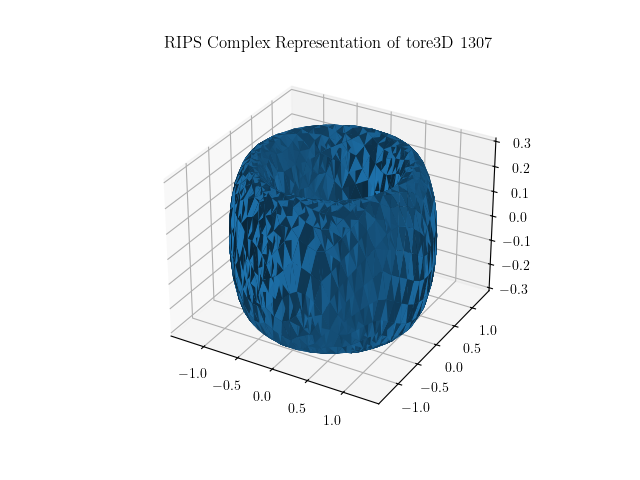


Alpha Complex:


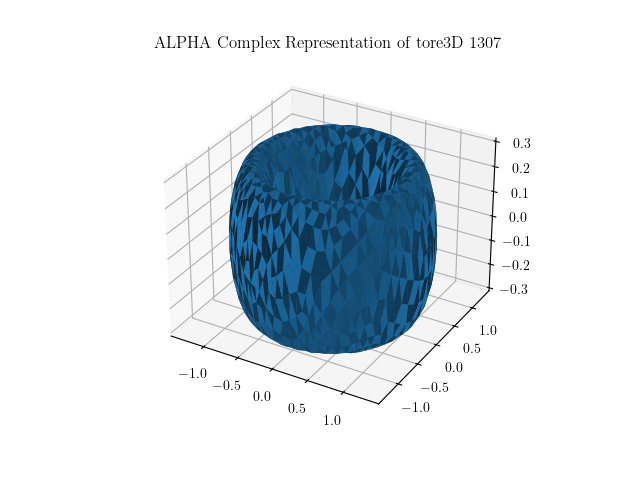


Alpha_inf Complex:


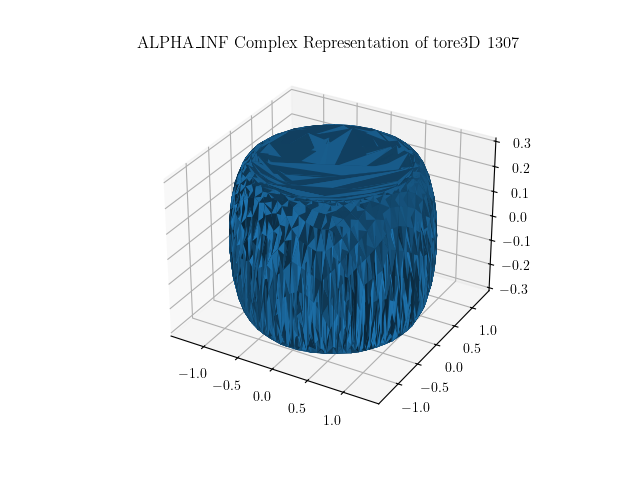


Witness Complex:


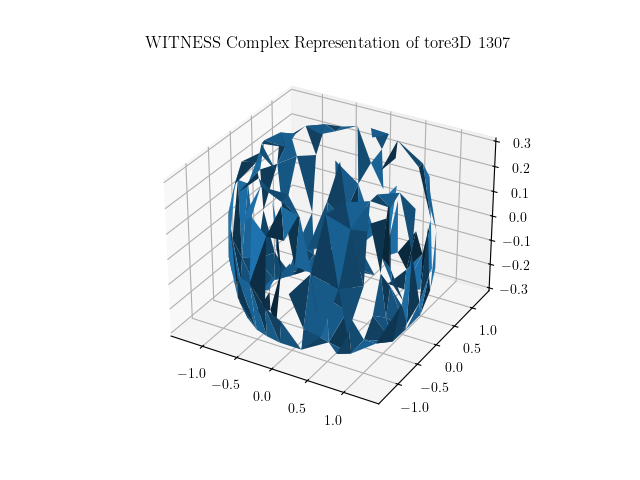


Relaxed_witness Complex:


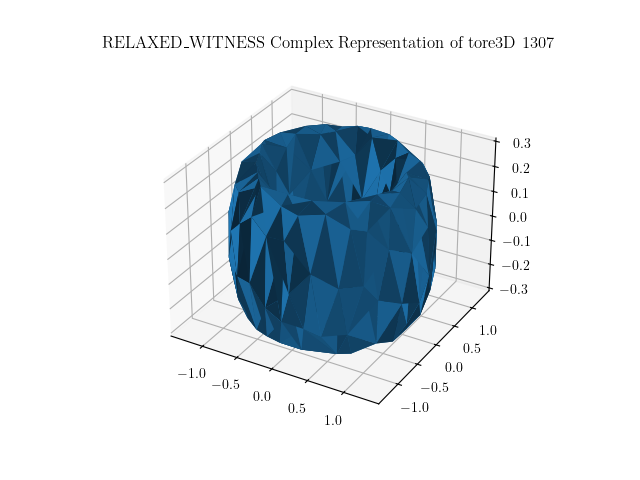


Strong_witness Complex:


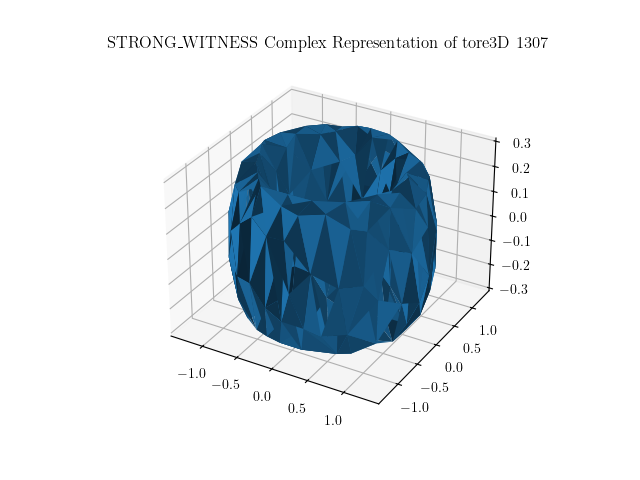


BOTTLENECK DISTANCE COMPUTATION

ALPHA-RIPS:
  Dimension 0: 0.06127273021907867
  Dimension 1: 0.052173512288324994
  Dimension 2: 0.06358231218008975

ALPHA_INF-RIPS:
  Dimension 0: 0.06127273021907867
  Dimension 1: inf
  Dimension 2: inf

ALPHA_INF-ALPHA:
  Dimension 0: 1.057818055851941e-308
  Dimension 1: inf
  Dimension 2: inf

WITNESS-RIPS:
  Dimension 0: 0.06127273021907867
  Dimension 1: inf
  Dimension 2: inf

WITNESS-ALPHA:
  Dimension 0: 0.03063636510953933
  Dimension 1: inf
  Dimension 2: inf

WITNESS-ALPHA_INF:
  Dimension 0: 0.03063636510953933
  Dimension 1: inf
  Dimension 2: 0.112981800560081

RELAXED_WITNESS-RIPS:
  Dimension 0: 0.06127273021907867
  Dimension 1: 0.10434702457665
  Dimension 2: 0.11255816096084248

RELAXED_WITNESS-ALPHA:
  Dimension 0: 0.03063636510953933
  Dimension 1: 0.05217351228832501
  Dimension 2: 0.048975848780752736

RELAXED_WITNESS-ALPHA_INF:
  Dimension 0: 0.03063636510953933
  Dimension 1: inf
  Dimension 2: inf

RELAXED_WITNESS-WITNESS

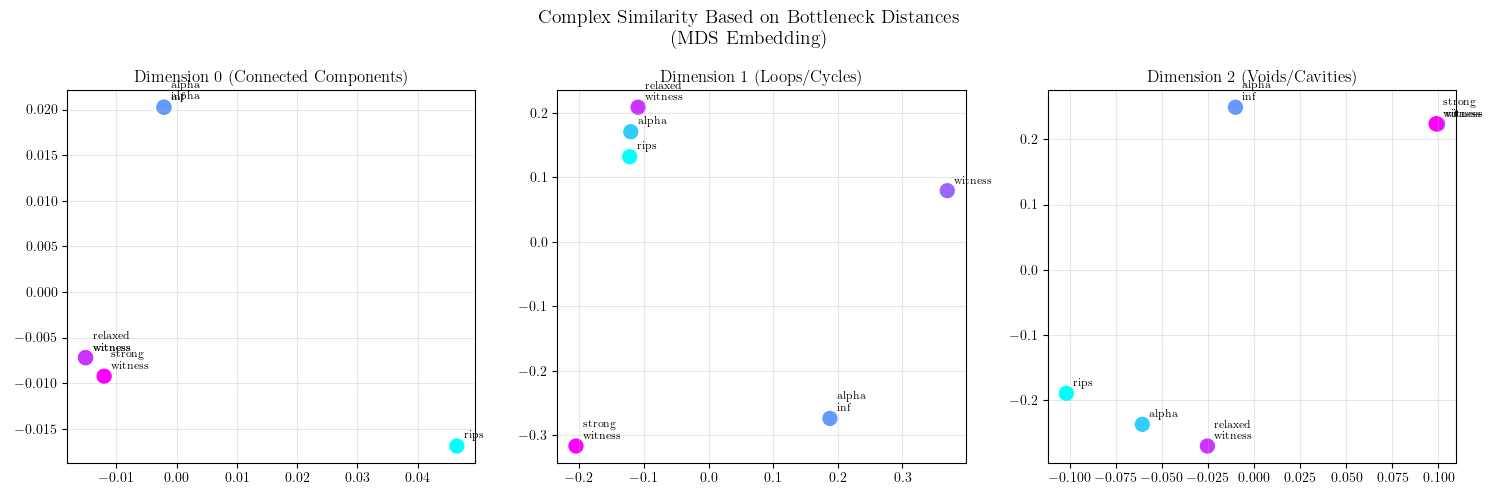


Distance Matrix Summary:

Dimension 0 (Connected Components):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.061272730219078676
Min non-zero distance: 7.26923830960017e-309

Dimension 1 (Loops/Cycles):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.5248333141355503
Min non-zero distance: 0.05217351228832499

Dimension 2 (Voids/Cavities):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.5119447382475505
Min non-zero distance: 0.001406008227499981


In [3]:
import argparse
# import math
import numpy as np
import gudhi as gd
import sys
from dataclasses import dataclass
from typing import Dict
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import sklearn.manifold as manifold
import copy
%matplotlib widget

# plt.close('all')  # Close any existing plots to avoid conflicts

@dataclass
class ComplexResult:
    """Store results for a simplicial complex"""
    stree: gd.SimplexTree
    name: str
    num_simplices: int
    intervals: Dict[int, NDArray[np.float64]]
    points: NDArray[np.float64]

def setup_args():
    """Setup command line arguments"""
    sys.argv = [
        'notebook1',
        '-f', '/home/unipi/i.inuso/Develop/unipi-lab-comp-project/tore3D_1307.off',
        '-t', '0.15',
        '-d', '3'
    ]
    
    parser = argparse.ArgumentParser(
        description="Compare AlphaComplex and RipsComplex persistence with bottleneck distances",
        epilog="Example: script.py -f tore3D_1307.off -t 0.15 -d 3"
    )
    parser.add_argument("-f", "--file", type=str, required=True)
    parser.add_argument("-t", "--threshold", type=float, default=0.5)
    parser.add_argument("-d", "--max_dimension", type=int, default=1)
    
    return parser.parse_args()

def estimate_max_edge_length(point_cloud: NDArray[np.float64], scale_factor: float = 0.05) -> float:
    """Estimate max edge length from point cloud"""
    data_range = np.linalg.norm(np.ptp(point_cloud, axis=0))
    return max(data_range * scale_factor, 1e-6)

def create_complexes(point_cloud: NDArray[np.float64], max_edge_length: float, max_dimension: int) -> Dict[str, ComplexResult]:
    """Create all complexes and compute persistence"""
    complexes = {}
    list = []
    # Rips Complex
    print(f"Creating RipsComplex (max_edge_length={max_edge_length})")
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    rips_stree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    rips_pers = rips_stree.persistence()
    gd.plot_persistence_diagram(rips_pers, legend=True)
    plt.show()
    rips_points = point_cloud  # Use original point cloud
    list.append(("rips", rips_stree, rips_points))
    
    # Alpha Complex (bounded)
    print(f"Creating AlphaComplex (max_alpha_square={max_edge_length**2})")
    alpha_complex = gd.AlphaComplex(points=point_cloud)
    alpha_stree = alpha_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    alpha_pers = alpha_stree.persistence()
    gd.plot_persistence_diagram(alpha_pers, legend=True)
    plt.show()
    alpha_points = point_cloud  # Use original point cloud
    list.append(("alpha", alpha_stree, alpha_points))
    
    # Alpha Complex (unbounded)
    print(f"Creating AlphaComplex (unbounded)")
    alpha_inf_stree = alpha_complex.create_simplex_tree()
    alpha_inf_pers = alpha_inf_stree.persistence()
    gd.plot_persistence_diagram(alpha_inf_pers, legend=True)
    plt.show()
    alpha_inf_points = point_cloud  # Use original point cloud
    list.append(("alpha_inf", alpha_inf_stree, alpha_inf_points))

    # Weak Witness Complex
    print(f"Creating Weak Witness Complex (max_alpha_square=0)")
    num_landmarks = max(1, int(len(point_cloud) * 0.15))
    landmarks = gd.subsampling.choose_n_farthest_points(points=point_cloud, nb_points=num_landmarks)
    print(f"{landmarks=}")
    witness_complex = gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    witness_stree = witness_complex.create_simplex_tree(max_alpha_square=0)
    witness_pers = witness_stree.persistence()
    gd.plot_persistence_diagram(witness_pers, legend=True)
    plt.show()
    witness_points = np.array(landmarks)  # Use landmarks for witness complexes
    list.append(("witness", witness_stree, witness_points))

    # Relaxed Weak Witness Complex
    print(f"Creating Relaxed Weak Witness Complex (max_alpha_square={max_edge_length**2})")
    relaxed_witness_complex = gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    relaxed_witness_stree = relaxed_witness_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    relaxed_witness_pers = relaxed_witness_stree.persistence()
    gd.plot_persistence_diagram(relaxed_witness_pers, legend=True)
    plt.show()
    list.append(("relaxed_witness", relaxed_witness_stree, witness_points))

    # Strong Witness Complex
    print(f"Creating Strong Witness Complex (max_alpha_square={max_edge_length**2})")
    strong_witness_complex = gd.EuclideanStrongWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    strong_witness_stree = strong_witness_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    strong_witness_pers = strong_witness_stree.persistence()
    gd.plot_persistence_diagram(strong_witness_pers, legend=True)
    plt.show()
    list.append(("strong_witness", strong_witness_stree, witness_points))

    # Store results
    for name, stree, points in list:
        intervals = {}
        for dim in range(max_dimension):
            intervals[dim] = stree.persistence_intervals_in_dimension(dim)
            # Transform alpha intervals (square root of filtration values)
            if "alpha" in name:
                intervals[dim] = np.sqrt(intervals[dim])
        
        complexes[name] = ComplexResult(
            stree=stree,
            name=name,
            num_simplices=stree.num_simplices(),
            intervals=intervals,
            points=points
        )
        print(f"{name.capitalize()} complex: {complexes[name].num_simplices} simplices")
    
    return complexes

# def create_complexes(point_cloud: NDArray[np.float64], max_edge_length: float, max_dimension: int) -> Dict[str, ComplexResult]:
#     """Create all complexes and compute persistence"""
#     complexes = {}
    
#     # Setup common parameters
#     landmarks = gd.subsampling.choose_n_farthest_points(
#         points=point_cloud, nb_points=max(1, int(len(point_cloud) * 0.15))
#     )
#     max_alpha_sq = max_edge_length**2
    
#     # Define complex configurations with both complex and simplex tree creation
#     complex_configs = [
#         ("rips", lambda: (gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length), 
#                          lambda c: c.create_simplex_tree(max_dimension=max_dimension))),
#         ("alpha", lambda: (gd.AlphaComplex(points=point_cloud), 
#                           lambda c: c.create_simplex_tree(max_alpha_square=max_alpha_sq))),
#         ("alpha_inf", lambda: (gd.AlphaComplex(points=point_cloud), 
#                               lambda c: c.create_simplex_tree())),
#         ("witness", lambda: (gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks), 
#                             lambda c: c.create_simplex_tree(max_alpha_square=0))),
#         ("relaxed_witness", lambda: (gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks), 
#                                     lambda c: c.create_simplex_tree(max_alpha_square=max_alpha_sq))),
#         ("strong_witness", lambda: (gd.EuclideanStrongWitnessComplex(witnesses=point_cloud, landmarks=landmarks), 
#                                    lambda c: c.create_simplex_tree(max_alpha_square=max_alpha_sq)))
#     ]
    
#     # Create complexes and compute persistence
#     for name, create_func in complex_configs:
#         print(f"Creating {name.replace('_', ' ').title()} Complex")
#         complex, stree_func = create_func()
#         stree = stree_func(complex)
#         stree.compute_persistence()
        
#         # Extract intervals for each dimension
#         intervals = {}
#         for dim in range(max_dimension):
#             intervals[dim] = stree.persistence_intervals_in_dimension(dim)
#             # Transform alpha intervals (square root of filtration values)
#             if "alpha" in name and len(intervals[dim]) > 0:
#                 intervals[dim] = np.sqrt(np.maximum(intervals[dim], 0))
        
#         complexes[name] = ComplexResult(
#             stree=stree,
#             name=name,
#             num_simplices=stree.num_simplices(),
#             intervals=intervals
#         )
#         # Store the original complex object as an attribute
#         complexes[name].complex = complex
#         print(f"  {complexes[name].num_simplices} simplices")
    
#     return complexes

def visualize_complexes(complexes: Dict[str, ComplexResult], title: str):
    for complex_result in complexes.values():
        print(f"\n{complex_result.name.capitalize()} Complex:")
        triangles = np.array([s[0] for s in complex_result.stree.get_skeleton(2) if len(s[0]) == 3])
        edge_indices = np.array([s[0] for s in complex_result.stree.get_skeleton(1) if len(s[0]) == 2])
        #print(f"{edge_indices=}")
        edges = complex_result.points[edge_indices]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_trisurf(complex_result.points[:, 0], complex_result.points[:, 1], complex_result.points[:, 2], triangles = triangles)
        #ax.scatter3D(complex_result.points[:,0], complex_result.points[:,1], complex_result.points[:,2])
        #ax.add_collection3d(Line3DCollection(edges, alpha=0.3))
        plt.title(f"\n{complex_result.name.upper()} Complex Representation of {title}")
        plt.show()

# def compute_bottleneck_distances(complexes: Dict[str, ComplexResult], max_dimension: int) -> Dict[str, float]:
#     """Compute all pairwise bottleneck distances"""
#     comparisons = [
#         ("rips", "alpha", "rips-alpha"),
#         ("rips", "alpha_inf", "rips-alpha_inf"),
#         ("rips", "witness", "rips-witness"),
#         ("rips", "relaxed_witness", "rips-relaxed_witness"),
#         ("rips", "strong_witness", "rips-strong_witness"),
#         ("alpha", "alpha_inf", "alpha-alpha_inf"),
#         ("alpha", "witness", "alpha-witness"),
#         ("alpha", "relaxed_witness", "alpha-relaxed_witness"),
#         ("alpha", "strong_witness", "alpha-strong_witness"),
#         ("alpha_inf", "witness", "alpha_inf-witness"),
#         ("alpha_inf", "relaxed_witness", "alpha_inf-relaxed_witness"),
#         ("alpha_inf", "strong_witness", "alpha_inf-strong_witness"),
#         ("witness", "relaxed_witness", "witness-relaxed_witness"),
#         ("witness", "strong_witness", "witness-strong_witness"),
#         ("relaxed_witness", "strong_witness", "relaxed_witness-strong_witness")
#     ]
    
#     results = {}
#     print("\n" + "="*60)
#     print("BOTTLENECK DISTANCE COMPUTATION")
#     print("="*60)

#     for comp1, comp2, label in comparisons:
#         max_distance = 0.0
#         print(f"\n{label.upper()}:")
        
#         for dim in range(max_dimension):
#             intervals1 = complexes[comp1].intervals[dim]
#             intervals2 = complexes[comp2].intervals[dim]
            
#             distance = gd.bottleneck_distance(intervals1, intervals2)
            
#             print(f"  Dimension {dim}: {distance}")
#             max_distance = max(distance, max_distance)
        
#         results[label] = max_distance
#         print(f"  Max distance: {max_distance}")
    
#     return results

def compute_bottleneck_distances(complexes: Dict[str, ComplexResult], max_dimension: int): #-> Dict[str, float]
    """Compute all pairwise bottleneck distances and visualize with MDS plots"""
    
    # Get complex names for labeling
    complex_names = list(complexes.keys())
    n_complexes = len(complex_names)

        # Initialize distance tensor: [max_dimension, n_complexes, n_complexes]
    distance_matrices = np.zeros((max_dimension, n_complexes, n_complexes))
    
    #results = {}
    print("\n" + "="*60)
    print("BOTTLENECK DISTANCE COMPUTATION")
    print("="*60)

    # Compute all pairwise distances for distance matrices
    for i, name1 in enumerate(complex_names):
        for j, name2 in enumerate(complex_names[:i]):
            label = (f"{name1}-{name2}")
            print(f"\n{label.upper()}:")
            for dim in range(max_dimension):
                intervals1 = complexes[name1].intervals[dim]
                intervals2 = complexes[name2].intervals[dim]
                distance = gd.bottleneck_distance(intervals1, intervals2)
                print(f"  Dimension {dim}: {distance}")
                distance_matrices[dim, i, j] = distance
                distance_matrices[dim, j, i] = distance

    # Compute max distances across dimensions for each pair of complexes
    max_distances = np.max(distance_matrices, axis=0)
    # for i, name1 in enumerate(complex_names):
    #     for j, name2 in enumerate(complex_names[:i]):
    #         label = f"{name1}-{name2}"
    #         max_distance = max_distances[i, j]
    #         results[label] = max_distance
    
    # Print distance matrix as a table
    print("\n" + "="*80)
    print("MAX BOTTLENECK DISTANCE MATRIX")
    print("="*80)
    
    # Create header
    header = f"{'Complex':<20}"
    for name in complex_names:
        header += f"{name:<18}"
    print(header)
    print("-" * len(header))
    
    # Print matrix rows
    for i, name1 in enumerate(complex_names):
        row = f"{name1:<20}"
        for j, name2 in enumerate(complex_names):
            if i == j:
                row += f"{'0.000':<18}"
            elif i > j:
                row += f"{max_distances[i, j]:<18.8f}"
            else:
                row += f"{max_distances[j, i]:<18.8f}"
        print(row)
    
    print("\n" + "="*60)
    print("CORRECTED BOTTLENECK DISTANCE COMPUTATION")
    print("="*60)
    
    # Handle infinity intervals by finding global maximum and replacing infinities
    all_intervals = []
    for complex_result in complexes.values():
        for dim in range(max_dimension):
            all_intervals.extend(complex_result.intervals[dim])
    
    # Find global maximum finite death value
    global_max_death = max(
        interval[1] for interval in all_intervals 
        if interval[1] != float('inf')
    )
    replacement_value = 1.5 * global_max_death
    print(f"\nGlobal maximum death value: {global_max_death}")
    print(f"Using replacement value for infinity intervals: {replacement_value}")
    
    # Create corrected intervals with infinity replacement
    corrected_complexes = {}
    for name, complex_result in complexes.items():
        corrected_intervals = {}
        for dim in range(max_dimension):
            intervals_copy = copy.deepcopy(complex_result.intervals[dim])
            for interval in intervals_copy:
                if interval[1] == float('inf'):
                    interval[1] = replacement_value
            corrected_intervals[dim] = intervals_copy
        corrected_complexes[name] = corrected_intervals

    # # Compute pairwise bottleneck distances
    # comparisons = [
    #     ("rips", "alpha", "rips-alpha"),
    #     ("rips", "alpha_inf", "rips-alpha_inf"),
    #     ("rips", "witness", "rips-witness"),
    #     ("rips", "relaxed_witness", "rips-relaxed_witness"),
    #     ("rips", "strong_witness", "rips-strong_witness"),
    #     ("alpha", "alpha_inf", "alpha-alpha_inf"),
    #     ("alpha", "witness", "alpha-witness"),
    #     ("alpha", "relaxed_witness", "alpha-relaxed_witness"),
    #     ("alpha", "strong_witness", "alpha-strong_witness"),
    #     ("alpha_inf", "witness", "alpha_inf-witness"),
    #     ("alpha_inf", "relaxed_witness", "alpha_inf-relaxed_witness"),
    #     ("alpha_inf", "strong_witness", "alpha_inf-strong_witness"),
    #     ("witness", "relaxed_witness", "witness-relaxed_witness"),
    #     ("witness", "strong_witness", "witness-strong_witness"),
    #     ("relaxed_witness", "strong_witness", "relaxed_witness-strong_witness")
    # ]

    # Initialize distance tensor: [max_dimension, n_complexes, n_complexes]
    corrected_distance_matrices = np.zeros((max_dimension, n_complexes, n_complexes))
    
    #results = {}

    # Compute all pairwise distances for distance matrices
    for i, name1 in enumerate(complex_names):
        for j, name2 in enumerate(complex_names[:i]):
            label = (f"{name1}-{name2}")
            print(f"\n{label.upper()}:")
            for dim in range(max_dimension):
                intervals1 = corrected_complexes[name1][dim]
                intervals2 = corrected_complexes[name2][dim]
                distance = gd.bottleneck_distance(intervals1, intervals2)
                print(f"  Dimension {dim}: {distance}")
                corrected_distance_matrices[dim, i, j] = distance
                corrected_distance_matrices[dim, j, i] = distance

    # Compute max distances across dimensions for each pair of complexes
    corrected_max_distances = np.max(corrected_distance_matrices, axis=0)
    # for i, name1 in enumerate(complex_names):
    #     for j, name2 in enumerate(complex_names[:i]):
    #         label = f"{name1}-{name2}"
    #         max_distance = max_distances[i, j]
    #         results[label] = max_distance
    
    # Print distance matrix as a table
    print("\n" + "="*80)
    print("CORRECTED MAX BOTTLENECK DISTANCE MATRIX")
    print("="*80)
    
    # Create header
    header = f"{'Complex':<20}"
    for name in complex_names:
        header += f"{name:<18}"
    print(header)
    print("-" * len(header))
    
    # Print matrix rows
    for i, name1 in enumerate(complex_names):
        row = f"{name1:<20}"
        for j, name2 in enumerate(complex_names):
            if i == j:
                row += f"{'0.000':<18}"
            elif i > j:
                row += f"{corrected_max_distances[i, j]:<18.8f}"
            else:
                row += f"{corrected_max_distances[j, i]:<18.8f}"
        print(row)
        

    # # Compute max distances for specific comparisons
    # for comp1, comp2, label in comparisons:
    #     max_distance = 0.0
    #     print(f"\n{label.upper()}:")
        
    #     for dim in range(max_dimension):
    #         intervals1 = corrected_complexes[comp1][dim]
    #         intervals2 = corrected_complexes[comp2][dim]
            
    #         distance = gd.bottleneck_distance(intervals1, intervals2)
            
    #         print(f"  Dimension {dim}: {distance}")
    #         max_distance = max(distance, max_distance)
        
    #     results[label] = max_distance
    #     print(f"  Max distance: {max_distance}")
    
    # Create MDS visualization
    print("\n" + "="*60)
    print("MDS VISUALIZATION")
    print("="*60)
    
    # Setup MDS
    mds = manifold.MDS(
        n_components=2,
        max_iter=3000,
        eps=1e-9,
        dissimilarity="precomputed",
        n_jobs=1,
        n_init=1
    )
    
    # Apply MDS to each dimension's distance matrix
    mds_results = {}
    for dim in range(max_dimension):
        # # Make matrix symmetric
        # symmetric_matrix = corrected_distance_matrices[dim] + corrected_distance_matrices[dim].T
        mds_results[dim] = mds.fit_transform(corrected_distance_matrices[dim])
    
    # Create visualization
    fig, axes = plt.subplots(1, max_dimension, figsize=(5 * max_dimension, 5))
    if max_dimension == 1:
        axes = [axes]  # Ensure axes is iterable for single subplot
    
    dimension_names = ['Connected Components', 'Loops/Cycles', 'Voids/Cavities']
    
    for dim in range(max_dimension):
        ax = axes[dim]
        
        # Plot points
        ax.scatter(mds_results[dim][:, 0], mds_results[dim][:, 1], 
                           c=range(n_complexes), cmap='cool', s=100)
        
        # Add labels
        for i, name in enumerate(complex_names):
            ax.annotate(name.replace('_', '\n'), 
                       (mds_results[dim][i, 0], mds_results[dim][i, 1]),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, ha='left')
        
        ax.set_title(f'Dimension {dim} ({dimension_names[dim]})')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Complex Similarity Based on Bottleneck Distances\n(MDS Embedding)', 
                fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print distance matrix summary
    print("\nDistance Matrix Summary:")
    for dim in range(max_dimension):
        print(f"\nDimension {dim} ({dimension_names[dim]}):")
        print("Complex names:", complex_names)
        print("Distance matrix shape:", corrected_distance_matrices[dim].shape)
        print("Max distance:", np.max(corrected_distance_matrices[dim]))
        print("Min non-zero distance:", np.min(corrected_distance_matrices[dim][corrected_distance_matrices[dim] > 0]))

    #return results

def main():
    """Main function"""
    args = setup_args()
    
    # Load data
    point_cloud = gd.read_points_from_off_file(off_file=args.file)
    max_edge_length = estimate_max_edge_length(point_cloud)

    # Title for visualization
    title = args.file.split('/')[-1].replace('.off', '').replace('_', ' ')
    
    print("="*60)
    print("SIMPLICIAL COMPLEX COMPARISON")
    print("="*60)
    print(f"File: {args.file}")
    print(f"Points: {len(point_cloud)}")
    print(f"Max edge length: {max_edge_length}")
    print(f"Max dimension: {args.max_dimension}")
    print("="*60)
    
    # Create complexes
    complexes = create_complexes(point_cloud, max_edge_length, args.max_dimension)

    # Plot complexes
    visualize_complexes(complexes, title)

    # Compute bottleneck distances
    compute_bottleneck_distances(complexes, args.max_dimension)
    
    # # Summary
    # print("\n" + "="*60)
    # print("SUMMARY")
    # print("="*60)
    # for label, distance in distances.items():
    #     print(f"Max bottleneck distance {label}: {distance}")

if __name__ == "__main__":
    main()

SIMPLICIAL COMPLEX COMPARISON
File: /home/unipi/i.inuso/Develop/unipi-lab-comp-project/dragon_vrip_sampled_1750.npy
Points: 1750
Max edge length: 0.013149221427738667
Max dimension: 3
Creating RipsComplex (max_edge_length=0.013149221427738667)
Creating AlphaComplex (max_alpha_square=0.00017290202958974987)
Creating AlphaComplex (unbounded)
Creating Weak Witness Complex (max_alpha_square=0)
landmarks=[[-0.018022999167442322, 0.05534930154681206, -0.0034374999813735485], [0.0943697988986969, 0.14862500131130219, -0.005537500139325857], [-0.09314370155334473, 0.17942500114440918, 0.008812510408461094], [-0.004022989887744188, 0.19395600259304047, -0.02968749962747097], [0.0726270005106926, 0.06252499669790268, 0.0178482998162508], [-0.08592300117015839, 0.09507499635219574, -0.006942459847778082], [0.018727000802755356, 0.12130799889564514, -0.016737500205636024], [0.032026998698711395, 0.058827199041843414, -0.049287501722574234], [-0.050923001021146774, 0.1475590020418167, -0.0289875008

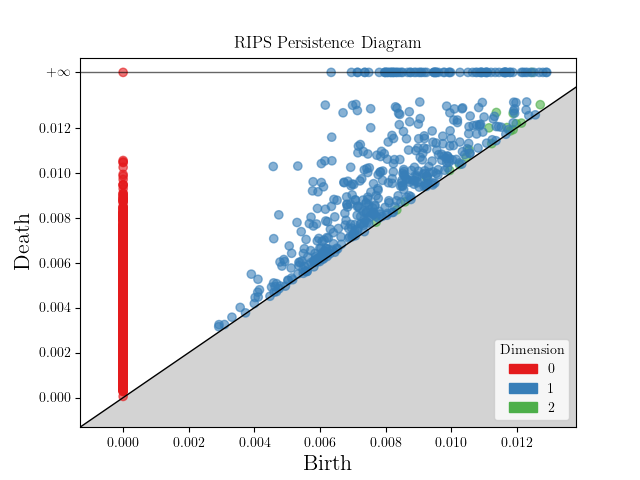


Alpha Complex Persistence Diagram:


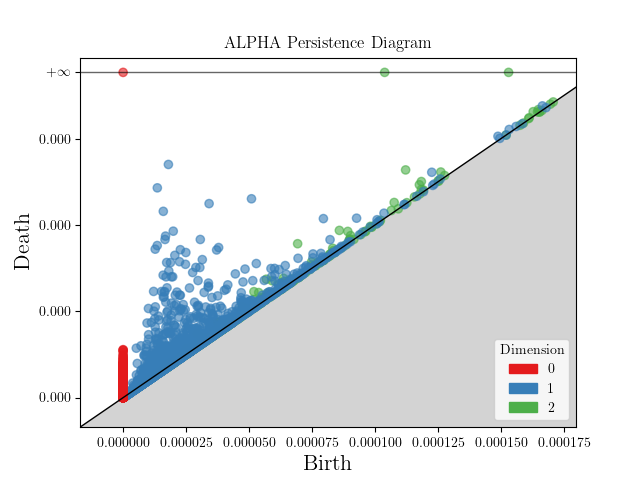


Alpha_inf Complex Persistence Diagram:


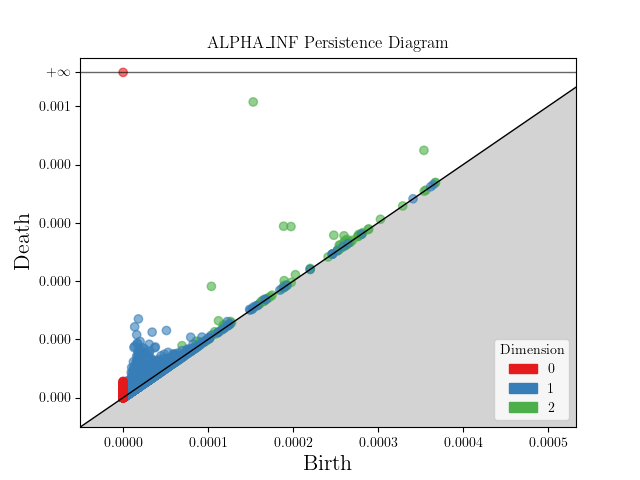


Witness Complex Persistence Diagram:


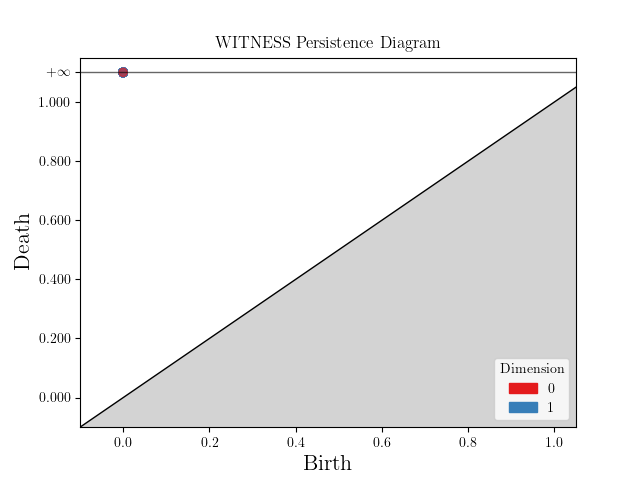


Relaxed_witness Complex Persistence Diagram:


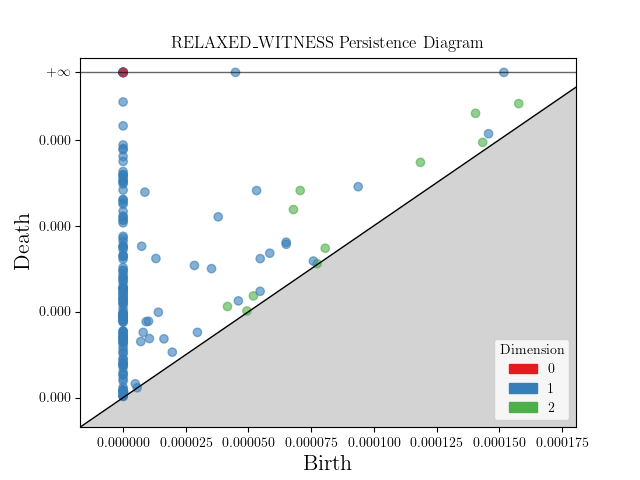


Strong_witness Complex Persistence Diagram:


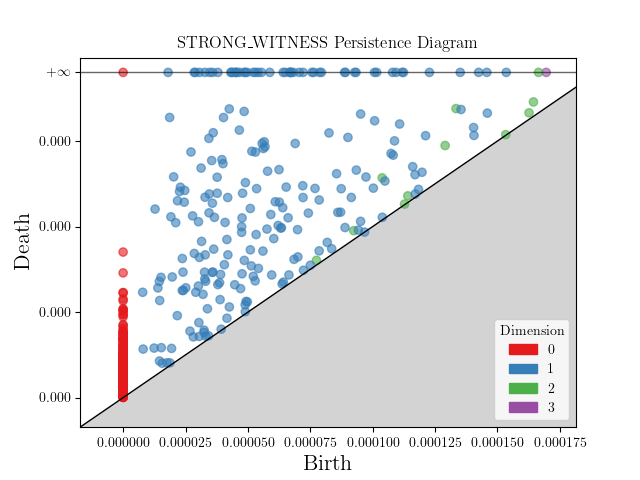


Rips Complex:


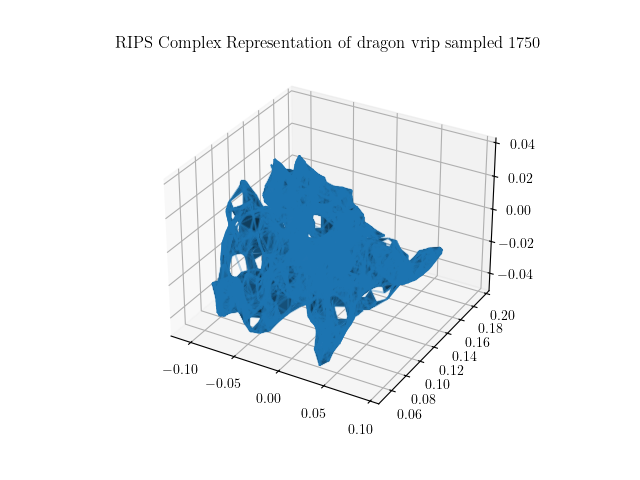


Alpha Complex:


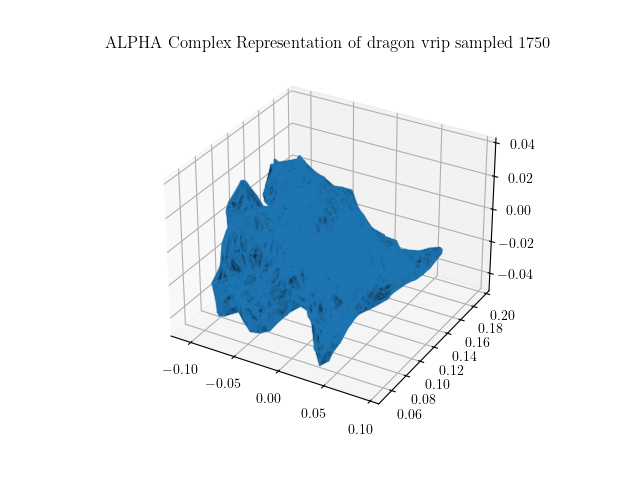


Alpha_inf Complex:


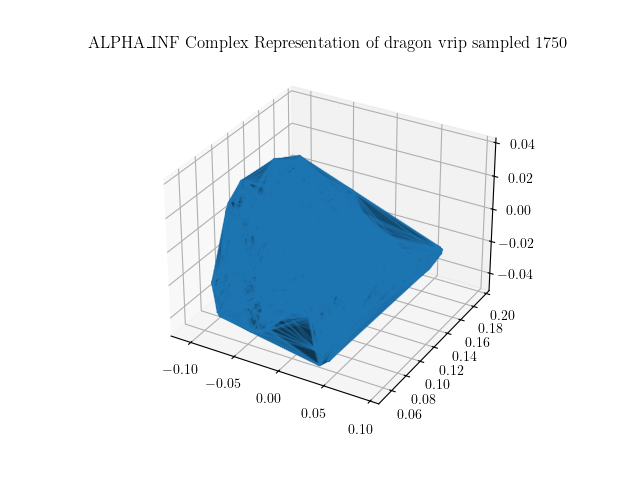


Witness Complex:


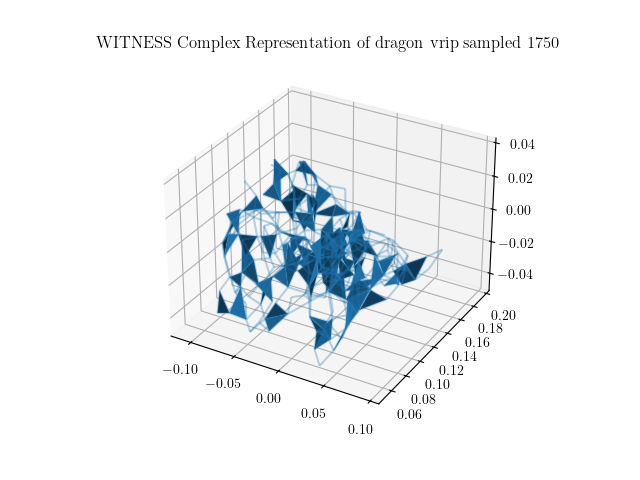


Relaxed_witness Complex:


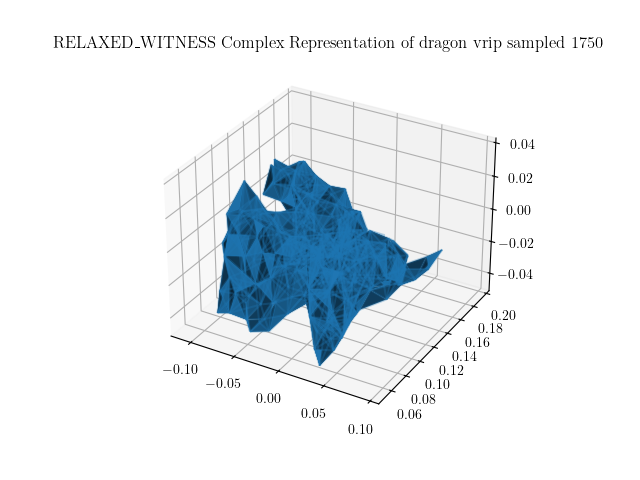


Strong_witness Complex:


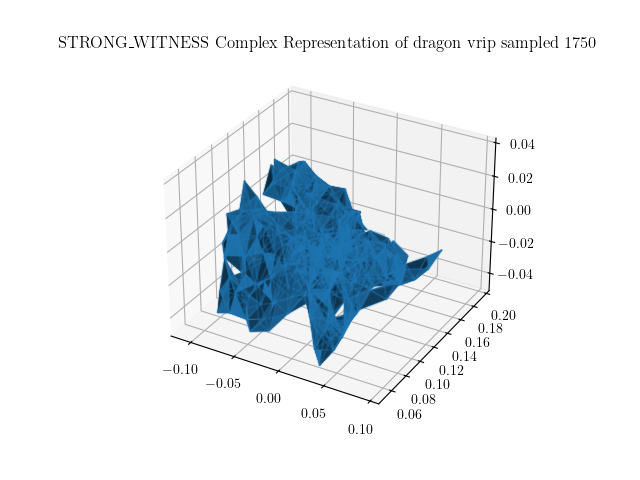


BOTTLENECK DISTANCE COMPUTATION

ALPHA-RIPS:
  Dimension 0: 0.005272890306406447
  Dimension 1: inf
  Dimension 2: inf

ALPHA_INF-RIPS:
  Dimension 0: 0.005272890306406447
  Dimension 1: inf
  Dimension 2: inf

ALPHA_INF-ALPHA:
  Dimension 0: 4.39259883481616e-309
  Dimension 1: 9.258000691274998e-06
  Dimension 2: inf

WITNESS-RIPS:
  Dimension 0: 0.005272890306406447
  Dimension 1: inf
  Dimension 2: inf

WITNESS-ALPHA:
  Dimension 0: 0.0026364451532032234
  Dimension 1: inf
  Dimension 2: inf

WITNESS-ALPHA_INF:
  Dimension 0: 0.0026364451532032234
  Dimension 1: inf
  Dimension 2: 0.005078445717814446

RELAXED_WITNESS-RIPS:
  Dimension 0: 0.005272890306406447
  Dimension 1: inf
  Dimension 2: inf

RELAXED_WITNESS-ALPHA:
  Dimension 0: 0.0026364451532032234
  Dimension 1: inf
  Dimension 2: inf

RELAXED_WITNESS-ALPHA_INF:
  Dimension 0: 0.0026364451532032234
  Dimension 1: inf
  Dimension 2: 0.005078445717814446

RELAXED_WITNESS-WITNESS:
  Dimension 0: 0.0
  Dimension 1: inf
  Dime

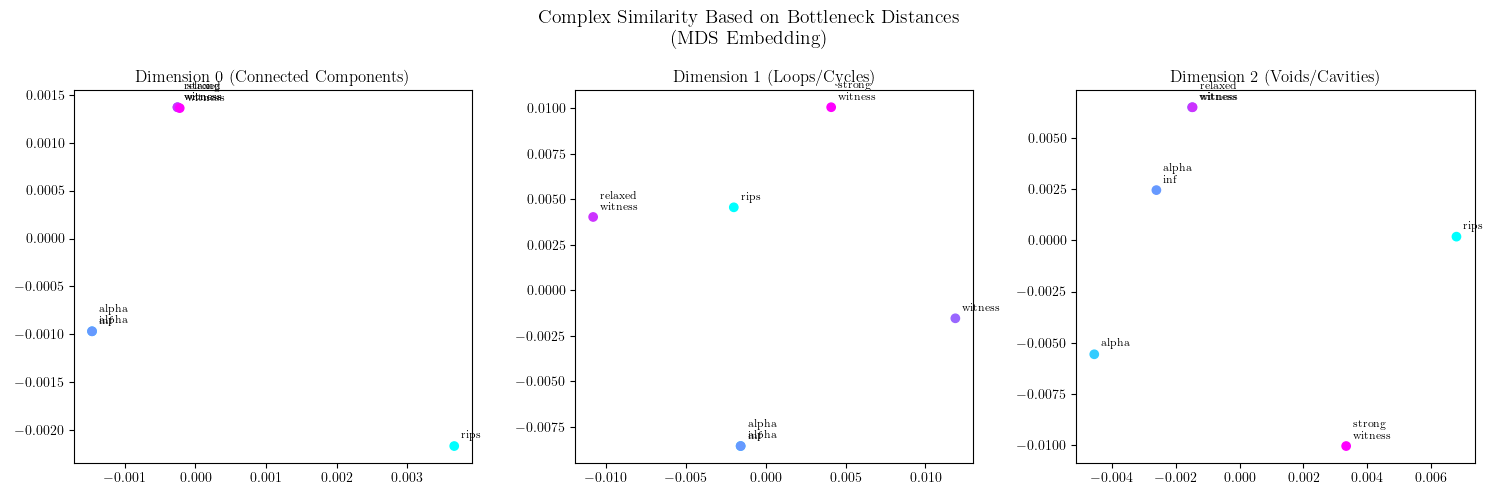


Distance Matrix Summary:

Dimension 0 (Connected Components):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.005272890306406448
Min non-zero distance: 5.24007982469604e-309

Dimension 1 (Loops/Cycles):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.01689845230882553
Min non-zero distance: 9.258000691274998e-06

Dimension 2 (Voids/Cavities):
Complex names: ['rips', 'alpha', 'alpha_inf', 'witness', 'relaxed_witness', 'strong_witness']
Distance matrix shape: (6, 6)
Max distance: 0.01681520834390096
Min non-zero distance: 2.494552308146005e-05


In [6]:
import argparse
import numpy as np
import gudhi as gd
import sys
from dataclasses import dataclass
from typing import Dict
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import sklearn.manifold as manifold
import copy
import plotly.graph_objects as go
import src.plotly_persistence as pp
#%matplotlib widget

#plt.close('all')  # Close any existing plots to avoid conflicts

@dataclass
class ComplexResult:
    """Store results for a simplicial complex"""
    stree: gd.SimplexTree
    name: str
    num_simplices: int
    persistence: list[tuple[int, tuple[np.float64, np.float64]]]
    intervals: Dict[int, NDArray[np.float64]]
    points: NDArray[np.float64]

def setup_args():
    """Setup command line arguments"""
    sys.argv = [
        'notebook1',
        '-f', '/home/unipi/i.inuso/Develop/unipi-lab-comp-project/dragon_vrip_sampled_1750.npy',
        '-t', '0.15',
        '-d', '3'
    ]
    
    parser = argparse.ArgumentParser(
        description="Compare AlphaComplex and RipsComplex persistence with bottleneck distances",
        epilog="Example: script.py -f tore3D_1307.off -t 0.15 -d 3"
    )
    parser.add_argument("-f", "--file", type=str, required=True)
    parser.add_argument("-t", "--threshold", type=float, default=0.5)
    parser.add_argument("-d", "--max_dimension", type=int, default=1)
    
    return parser.parse_args()

def estimate_max_edge_length(point_cloud: NDArray[np.float64], scale_factor: float = 0.05) -> float:
    """Estimate max edge length from point cloud"""
    data_range = np.linalg.norm(np.ptp(point_cloud, axis=0))
    return max(data_range * scale_factor, 1e-6)

def create_complexes(point_cloud: NDArray[np.float64], max_edge_length: float, max_dimension: int) -> Dict[str, ComplexResult]:
    """Create all complexes and compute persistence"""
    complexes = {}
    list = []
    # Rips Complex
    print(f"Creating RipsComplex (max_edge_length={max_edge_length})")
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    rips_stree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    # rips_pers = rips_stree.persistence()
    # gd.plot_persistence_diagram(rips_pers, legend=True)
    # plt.show()
    rips_points = point_cloud  # Use original point cloud
    list.append(("rips", rips_stree, rips_points))
    
    # Alpha Complex (bounded)
    print(f"Creating AlphaComplex (max_alpha_square={max_edge_length**2})")
    alpha_complex = gd.AlphaComplex(points=point_cloud)
    alpha_stree = alpha_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    # alpha_pers = alpha_stree.persistence()
    # gd.plot_persistence_diagram(alpha_pers, legend=True)
    # plt.show()
    alpha_points = point_cloud  # Use original point cloud
    list.append(("alpha", alpha_stree, alpha_points))
    
    # Alpha Complex (unbounded)
    print(f"Creating AlphaComplex (unbounded)")
    alpha_inf_stree = alpha_complex.create_simplex_tree()
    # alpha_inf_pers = alpha_inf_stree.persistence()
    # gd.plot_persistence_diagram(alpha_inf_pers, legend=True)
    # plt.show()
    alpha_inf_points = point_cloud  # Use original point cloud
    list.append(("alpha_inf", alpha_inf_stree, alpha_inf_points))

    # Weak Witness Complex
    print(f"Creating Weak Witness Complex (max_alpha_square=0)")
    num_landmarks = max(1, int(len(point_cloud) * 0.15))
    landmarks = gd.subsampling.choose_n_farthest_points(points=point_cloud, nb_points=num_landmarks)
    print(f"{landmarks=}")
    witness_complex = gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    witness_stree = witness_complex.create_simplex_tree(max_alpha_square=0)
    # witness_pers = witness_stree.persistence()
    # gd.plot_persistence_diagram(witness_pers, legend=True)
    # plt.show()
    witness_points = np.array(landmarks)  # Use landmarks for witness complexes
    list.append(("witness", witness_stree, witness_points))

    # Relaxed Weak Witness Complex
    print(f"Creating Relaxed Weak Witness Complex (max_alpha_square={max_edge_length**2})")
    relaxed_witness_complex = gd.EuclideanWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    relaxed_witness_stree = relaxed_witness_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    # relaxed_witness_pers = relaxed_witness_stree.persistence()
    # gd.plot_persistence_diagram(relaxed_witness_pers, legend=True)
    # plt.show()
    list.append(("relaxed_witness", relaxed_witness_stree, witness_points))

    # Strong Witness Complex
    print(f"Creating Strong Witness Complex (max_alpha_square={max_edge_length**2})")
    strong_witness_complex = gd.EuclideanStrongWitnessComplex(witnesses=point_cloud, landmarks=landmarks)
    strong_witness_stree = strong_witness_complex.create_simplex_tree(max_alpha_square=max_edge_length**2)
    # strong_witness_pers = strong_witness_stree.persistence()
    # gd.plot_persistence_diagram(strong_witness_pers, legend=True)
    # plt.show()
    list.append(("strong_witness", strong_witness_stree, witness_points))

    # Store results
    for name, stree, points in list:
        intervals = {}
        persistence = stree.persistence()

        for dim in range(max_dimension):
            intervals[dim] = stree.persistence_intervals_in_dimension(dim)
            # Transform alpha intervals (square root of filtration values)
            if "alpha" in name:
                intervals[dim] = np.sqrt(intervals[dim])

        complexes[name] = ComplexResult(
            stree=stree,
            name=name,
            num_simplices=stree.num_simplices(),
            persistence=persistence,
            intervals=intervals,
            points=points
        )
        print(f"{name.capitalize()} complex: {complexes[name].num_simplices} simplices")
    
    return complexes

def plotly_plot_persistence_diagram(persistence: list[tuple[int, tuple[np.float64, np.float64]]], title: str = "Persistence Diagram", alpha_squared: bool = False):
    """
    Plot persistence diagram using Plotly that mimics gudhi.plot_persistence_diagram
    
    Parameters:
    -----------
    persistence : list
        List of persistence pairs from SimplexTree.persistence()
    title : str
        Title for the plot
    alpha_squared : bool
        Whether to take square root of alpha complex filtration values
    """
    
    # Separate persistence points by dimension
    dims = {}
    for point in persistence:
        dim = point[0]
        birth, death = point[1]
        
        # # Handle alpha complex filtration values
        # if alpha_squared and birth != float('inf') and death != float('inf'):
        #     birth = np.sqrt(max(0, birth))
        #     death = np.sqrt(max(0, death)) if death != float('inf') else float('inf')
        
        if dim not in dims:
            dims[dim] = {'birth': [], 'death': []}
        dims[dim]['birth'].append(birth)
        dims[dim]['death'].append(death)
    
    if not dims:
        # Empty persistence diagram
        fig = go.Figure()
        fig.update_layout(
            title=title,
            xaxis_title='Birth',
            yaxis_title='Death',
            showlegend=True,
            width=600,
            height=600
        )
        fig.show()
        return
    
    # Handle infinite death values
    max_death = 0
    min_birth = float('inf')
    
    for dim_data in dims.values():
        finite_deaths = [d for d in dim_data['death'] if d != float('inf')]
        finite_births = [b for b in dim_data['birth'] if b != float('inf')]
        
        if finite_deaths:
            max_death = max(max_death, max(finite_deaths))
        if finite_births:
            min_birth = min(min_birth, min(finite_births))
    
    # Set reasonable bounds
    if min_birth == float('inf'):
        min_birth = 0
    if max_death == 0:
        max_death = 1
    
    # Replace infinite values with appropriate visualization value
    plot_max = max_death * 1.3
    plot_min = min_birth - (max_death - min_birth) * 0.05
    
    fig = go.Figure()
    
    # Color scheme matching GUDHI style (similar to matplotlib defaults)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    
    # Plot points for each dimension
    for i, (dim, data) in enumerate(sorted(dims.items())):
        plot_deaths = [plot_max if d == float('inf') else d for d in data['death']]
        
        # Choose marker symbol based on dimension
        if dim == 0:
            symbol = 'circle'
        elif dim == 1:
            symbol = 'square'
        elif dim == 2:
            symbol = 'diamond'
        else:
            symbol = 'star'
        
        fig.add_trace(go.Scatter(
            x=data['birth'],
            y=plot_deaths,
            mode='markers',
            name=f'H{dim}',
            marker=dict(
                color=colors[i % len(colors)],
                size=8,
                symbol=symbol,
                #line=dict(width=1, color='black')
            ),
            hovertemplate=f'H{dim}<br>Birth: %{{x}}<br>Death: %{{customdata}}<extra></extra>',
            customdata=['+∞' if d == float('inf') else f'{d:.6f}' for d in data['death']]
        ))
    
    # Calculate plot range with padding
    data_range = max_death - min_birth
    padding = data_range * 0.1 if data_range > 0 else 1
    
    x_min = min_birth - padding
    x_max = max(max_death, max([max(data['birth']) for data in dims.values() if data['birth']])) + padding
    y_min = min_birth - padding
    y_max = plot_max + padding
    
    # Add diagonal line (y = x)
    fig.add_trace(go.Scatter(
        x=[x_min, x_max],
        y=[x_min, x_max],
        mode='lines',
        name='y = x',
        line=dict(color='gray', dash='dash', width=2),
        showlegend=False,
        hoverinfo='skip'
    ))
    
    # Add infinity line if there are infinite death values
    has_infinite = any(float('inf') in data['death'] for data in dims.values())
    if has_infinite:
        fig.add_trace(go.Scatter(
            x=[x_min, x_max],
            y=[plot_max, plot_max],
            mode='lines',
            name='Death = ∞',
            line=dict(color='gray', dash='dot', width=2),
            showlegend=False,
            hoverinfo='skip'
        ))
        
        # Add infinity annotation
        fig.add_annotation(
            x=padding,
            y=plot_max,
            text="∞",
            showarrow=False,
            xanchor="center",
            yanchor="bottom",
            font=dict(size=14, color='gray'),
            bgcolor="white",
            bordercolor="gray",
            borderwidth=1
        )

    # Update layout to match GUDHI style
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            font=dict(size=16)
        ),
        xaxis=dict(
            title='Birth',
            range=[x_min, x_max],
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray'
        ),
        yaxis=dict(
            title='Death',
            range=[y_min, y_max],
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray'
        ),
        showlegend=True,
        legend=dict(
            x=1.02,
            y=0,
            xanchor='right',
            yanchor='bottom',
            bgcolor='rgba(255,255,255,0.8)',
            #bordercolor='black',
            #borderwidth=1
        ),
        width=600,
        height=600,
        plot_bgcolor='white'
    )
    
    fig.show()
    return fig

def plot_persistence_diagrams(complexes: Dict[str, ComplexResult], mode: str = "gudhi"):
    """Plot persistence diagrams for all complexes"""
    for complex_result in complexes.values():
        print(f"\n{complex_result.name.capitalize()} Complex Persistence Diagram:")
        if mode == "plotly":
            pp.plot_persistence_diagram(
                complex_result.persistence, 
                title=f"{complex_result.name.upper()} Persistence Diagram"
            )
        elif mode == "gudhi":
            # Use GUDHI's built-in persistence diagram plotting
            gd.plot_persistence_diagram(complex_result.persistence, legend=True)
            plt.title(f"{complex_result.name.upper()} Persistence Diagram")
            plt.show()
        else:
            raise ValueError("Unsupported plotting mode. Use 'plotly' or 'gudhi'.")

def visualize_complexes(complexes: Dict[str, ComplexResult], title: str, mode: str = "matplotlib"):
    """Visualize simplicial complexes using either matplotlib or plotly"""
    if mode == "matplotlib":
        for complex_result in complexes.values():
            print(f"\n{complex_result.name.capitalize()} Complex:")
            triangles = np.array([s[0] for s in complex_result.stree.get_skeleton(2) if len(s[0]) == 3])
            edge_indices = np.array([s[0] for s in complex_result.stree.get_skeleton(1) if len(s[0]) == 2])
            #print(f"{edge_indices=}")
            edges = complex_result.points[edge_indices]
            fig = plt.figure()
            ax = fig.add_subplot(projection='3d')
            ax.plot_trisurf(complex_result.points[:, 0], complex_result.points[:, 1], complex_result.points[:, 2], triangles = triangles)
            #ax.scatter3D(complex_result.points[:,0], complex_result.points[:,1], complex_result.points[:,2])
            ax.add_collection3d(Line3DCollection(edges, alpha=0.3))
            plt.title(f"\n{complex_result.name.upper()} Complex Representation of {title}")
            plt.show()

    elif mode == "plotly":
        for complex_result in complexes.values():
            print(f"\n{complex_result.name.capitalize()} Complex:")
            triangles = np.array([s[0] for s in complex_result.stree.get_skeleton(2) if len(s[0]) == 3])
            edges = np.array([s[0] for s in complex_result.stree.get_skeleton(1) if len(s[0]) == 2])
            
            fig = go.Figure()
            
            # Add points
            fig.add_trace(go.Scatter3d(
                x=complex_result.points[:, 0],
                y=complex_result.points[:, 1], 
                z=complex_result.points[:, 2],
                mode='markers',
                marker=dict(size=3, color="#4a7fb5"),
                name='Points'
            ))
            #8f90d3
            
            # Add triangular mesh if triangles exist
            if len(triangles) > 0:
                fig.add_trace(go.Mesh3d(
                x=complex_result.points[:, 0],
                y=complex_result.points[:, 1],
                z=complex_result.points[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                # intensity=complex_result.points[:, 2],  # Use Z coordinate for coloring
                # colorscale='Haline',
                color='#1d6fa8',
                # opacity=0.6,
                name='Triangular Mesh',
                showlegend=True
                # showscale=False
                ))
            ##bbbeeb
            
            # Add edges
            if len(edges) > 0:
                edge_x = []
                edge_y = []
                edge_z = []
                for edge in edges:
                    edge_x.extend([complex_result.points[edge[0], 0], complex_result.points[edge[1], 0], None])
                    edge_y.extend([complex_result.points[edge[0], 1], complex_result.points[edge[1], 1], None])
                    edge_z.extend([complex_result.points[edge[0], 2], complex_result.points[edge[1], 2], None])
                
                fig.add_trace(go.Scatter3d(
                    x=edge_x,
                    y=edge_y,
                    z=edge_z,
                    mode='lines',
                    line=dict(color='#0e456a', width=1.5),
                    name='Edges'
                ))
            ##6b6ca3
            # '#1d6fa8'
            fig.update_layout(
                title=f"{complex_result.name.upper()} Complex Representation of {title}",
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'
                ),
                showlegend=True
            )
            
            fig.show()
    else:
        raise ValueError("Unsupported visualization mode. Use 'matplotlib' or 'plotly'.")

def compute_bottleneck_distances(complexes: Dict[str, ComplexResult], max_dimension: int): #-> Dict[str, float]
    """Compute all pairwise bottleneck distances and visualize with MDS plots"""
    
    # Get complex names for labeling
    complex_names = list(complexes.keys())
    n_complexes = len(complex_names)

        # Initialize distance tensor: [max_dimension, n_complexes, n_complexes]
    distance_matrices = np.zeros((max_dimension, n_complexes, n_complexes))
    
    #results = {}
    print("\n" + "="*60)
    print("BOTTLENECK DISTANCE COMPUTATION")
    print("="*60)

    # Compute all pairwise distances for distance matrices
    for i, name1 in enumerate(complex_names):
        for j, name2 in enumerate(complex_names[:i]):
            label = (f"{name1}-{name2}")
            print(f"\n{label.upper()}:")
            for dim in range(max_dimension):
                intervals1 = complexes[name1].intervals[dim]
                intervals2 = complexes[name2].intervals[dim]
                distance = gd.bottleneck_distance(intervals1, intervals2)
                print(f"  Dimension {dim}: {distance}")
                distance_matrices[dim, i, j] = distance
                distance_matrices[dim, j, i] = distance

    # Compute max distances across dimensions for each pair of complexes
    max_distances = np.max(distance_matrices, axis=0)
    # for i, name1 in enumerate(complex_names):
    #     for j, name2 in enumerate(complex_names[:i]):
    #         label = f"{name1}-{name2}"
    #         max_distance = max_distances[i, j]
    #         results[label] = max_distance
    
    # Print distance matrix as a table
    print("\n" + "="*80)
    print("MAX BOTTLENECK DISTANCE MATRIX")
    print("="*80)
    
    # Create header
    header = f"{'Complex':<20}"
    for name in complex_names:
        header += f"{name:<18}"
    print(header)
    print("-" * len(header))
    
    # Print matrix rows
    for i, name1 in enumerate(complex_names):
        row = f"{name1:<20}"
        for j, name2 in enumerate(complex_names):
            if i == j:
                row += f"{'0.000':<18}"
            elif i > j:
                row += f"{max_distances[i, j]:<18.8f}"
            else:
                row += f"{max_distances[j, i]:<18.8f}"
        print(row)
    
    print("\n" + "="*60)
    print("CORRECTED BOTTLENECK DISTANCE COMPUTATION")
    print("="*60)
    
    # Handle infinity intervals by finding global maximum and replacing infinities
    all_intervals = []
    for complex_result in complexes.values():
        for dim in range(max_dimension):
            all_intervals.extend(complex_result.intervals[dim])
    
    # Find global maximum finite death value
    global_max_death = max(
        interval[1] for interval in all_intervals 
        if interval[1] != float('inf')
    )
    replacement_value = 1.5 * global_max_death
    print(f"\nGlobal maximum death value: {global_max_death}")
    print(f"Using replacement value for infinity intervals: {replacement_value}")
    
    # Create corrected intervals with infinity replacement
    corrected_complexes = {}
    for name, complex_result in complexes.items():
        corrected_intervals = {}
        for dim in range(max_dimension):
            intervals_copy = copy.deepcopy(complex_result.intervals[dim])
            for interval in intervals_copy:
                if interval[1] == float('inf'):
                    interval[1] = replacement_value
            corrected_intervals[dim] = intervals_copy
        corrected_complexes[name] = corrected_intervals

    # Initialize distance tensor: [max_dimension, n_complexes, n_complexes]
    corrected_distance_matrices = np.zeros((max_dimension, n_complexes, n_complexes))
    
    #results = {}

    # Compute all pairwise distances for distance matrices
    for i, name1 in enumerate(complex_names):
        for j, name2 in enumerate(complex_names[:i]):
            label = (f"{name1}-{name2}")
            print(f"\n{label.upper()}:")
            for dim in range(max_dimension):
                intervals1 = corrected_complexes[name1][dim]
                intervals2 = corrected_complexes[name2][dim]
                distance = gd.bottleneck_distance(intervals1, intervals2)
                print(f"  Dimension {dim}: {distance}")
                corrected_distance_matrices[dim, i, j] = distance
                corrected_distance_matrices[dim, j, i] = distance

    # Compute max distances across dimensions for each pair of complexes
    corrected_max_distances = np.max(corrected_distance_matrices, axis=0)
    # for i, name1 in enumerate(complex_names):
    #     for j, name2 in enumerate(complex_names[:i]):
    #         label = f"{name1}-{name2}"
    #         max_distance = max_distances[i, j]
    #         results[label] = max_distance
    
    # Print distance matrix as a table
    print("\n" + "="*80)
    print("CORRECTED MAX BOTTLENECK DISTANCE MATRIX")
    print("="*80)
    
    # Create header
    header = f"{'Complex':<20}"
    for name in complex_names:
        header += f"{name:<18}"
    print(header)
    print("-" * len(header))
    
    # Print matrix rows
    for i, name1 in enumerate(complex_names):
        row = f"{name1:<20}"
        for j, name2 in enumerate(complex_names):
            if i == j:
                row += f"{'0.000':<18}"
            elif i > j:
                row += f"{corrected_max_distances[i, j]:<18.8f}"
            else:
                row += f"{corrected_max_distances[j, i]:<18.8f}"
        print(row)
    
    # Create MDS visualization
    print("\n" + "="*60)
    print("MDS VISUALIZATION")
    print("="*60)
    
    # Setup MDS
    mds = manifold.MDS(
        n_components=2,
        max_iter=3000,
        eps=1e-9,
        dissimilarity="precomputed",
        n_jobs=1,
        n_init=1
    )
    
    # Apply MDS to each dimension's distance matrix
    mds_results = {}
    for dim in range(max_dimension):
        mds_results[dim] = mds.fit_transform(corrected_distance_matrices[dim])
    
    # Create visualization
    _, axes = plt.subplots(1, max_dimension, figsize=(5 * max_dimension, 5))
    if max_dimension == 1:
        axes = [axes]  # Ensure axes is iterable for single subplot
    
    dimension_names = ['Connected Components', 'Loops/Cycles', 'Voids/Cavities']
    
    for dim in range(max_dimension):
        ax = axes[dim]
        
        # Plot points
        ax.scatter(mds_results[dim][:, 0], mds_results[dim][:, 1], 
                           c=range(n_complexes), cmap='cool')
        
        # Add labels
        for i, name in enumerate(complex_names):
            ax.annotate(name.replace('_', '\n'), 
                       (mds_results[dim][i, 0], mds_results[dim][i, 1]),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, ha='left')
        
        ax.set_title(f'Dimension {dim} ({dimension_names[dim]})')
        # ax.grid(True, alpha=0.3)
    
    plt.suptitle('Complex Similarity Based on Bottleneck Distances\n(MDS Embedding)', 
                fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print distance matrix summary
    print("\nDistance Matrix Summary:")
    for dim in range(max_dimension):
        print(f"\nDimension {dim} ({dimension_names[dim]}):")
        print("Complex names:", complex_names)
        print("Distance matrix shape:", corrected_distance_matrices[dim].shape)
        print("Max distance:", np.max(corrected_distance_matrices[dim]))
        print("Min non-zero distance:", np.min(corrected_distance_matrices[dim][corrected_distance_matrices[dim] > 0]))

    #return results

def main():
    """Main function"""
    args = setup_args()
    
    # Load data
    point_cloud = np.load(args.file)
    max_edge_length = estimate_max_edge_length(point_cloud)

    # Title for visualization
    title = args.file.split('/')[-1].replace('.npy', '').replace('_', ' ')
    
    print("="*60)
    print("SIMPLICIAL COMPLEX COMPARISON")
    print("="*60)
    print(f"File: {args.file}")
    print(f"Points: {len(point_cloud)}")
    print(f"Max edge length: {max_edge_length}")
    print(f"Max dimension: {args.max_dimension}")
    print("="*60)
    
    # Create complexes
    complexes = create_complexes(point_cloud, max_edge_length, args.max_dimension)
    plot_persistence_diagrams(complexes)

    # Plot complexes
    visualize_complexes(complexes, title)

    # Compute bottleneck distances
    compute_bottleneck_distances(complexes, args.max_dimension)
    
    # # Summary
    # print("\n" + "="*60)
    # print("SUMMARY")
    # print("="*60)
    # for label, distance in distances.items():
    #     print(f"Max bottleneck distance {label}: {distance}")

if __name__ == "__main__":
    main()